## Librerias Necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de Dataset

### Carga de datos
Se carga el archivo **heart.csv** y se prepara el DataFrame `df` para el análisis.

In [2]:
df = pd.read_csv('heart.csv')

## EDA

### Previsualización

### Inspección inicial
Se revisan dimensiones, tipos de dato, primeras filas y estadísticas descriptivas para entender la estructura del conjunto.

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0



Encontramos valores 0 en `RestingBP`/`Cholesterol` deben documentarse como posibles ausentes o mediciones no registradas. 

### Dimensiones del Dataset

In [4]:
df.shape

(918, 12)

 `df` con 918 filas y 12 columnas.

### Tipos de Variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


El dataset cuenta con 7 variables numéricas y 5 categóricas

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


- **Hallazgo:** media de edad ~53–54; distribución de `Sex` sesgada hacia masculino; `HeartDisease` ~55%.
- **Atención:** valores 0 en `RestingBP`/`Cholesterol` deben documentarse como posibles ausentes o mediciones no registradas.

### Valores únicos

In [7]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()} unique values")

Age: 50 unique values
Sex: 2 unique values
ChestPainType: 4 unique values
RestingBP: 67 unique values
Cholesterol: 222 unique values
FastingBS: 2 unique values
RestingECG: 3 unique values
MaxHR: 119 unique values
ExerciseAngina: 2 unique values
Oldpeak: 53 unique values
ST_Slope: 3 unique values
HeartDisease: 2 unique values


Revisamos que algunsa variables tengan la cantidad correcta de valores únicos como por ejemplo `HeartDisease` que deberia tener solo 2

### Limpieza de datos

In [8]:
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: np.nan if x < 0 else x)

Notamos que algunos valores en estas variables no son posibles, puede que hayan sido mal registrados o registrados como 0 para calisificarlos como nulos

### Valores faltantes
Se cuantifican valores nulos/ausentes por columna para evaluar la necesidad de imputación o limpieza.

In [ ]:
ms = df.isnull().sum()

NameError: name 'df' is not defined

: 

In [ ]:
missing_percent = (df.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    "Valores Faltantes": ms,
    "Porcentaje (%)": missing_percent
})

missing_df[missing_df["Valores Faltantes"] > 0]

Se presentan alguno valores nulos de los mal registrados 

### 📈 Análisis univariado (numéricas)
Se grafican histogramas de variables numéricas para evaluar forma, dispersión y posibles outliers.

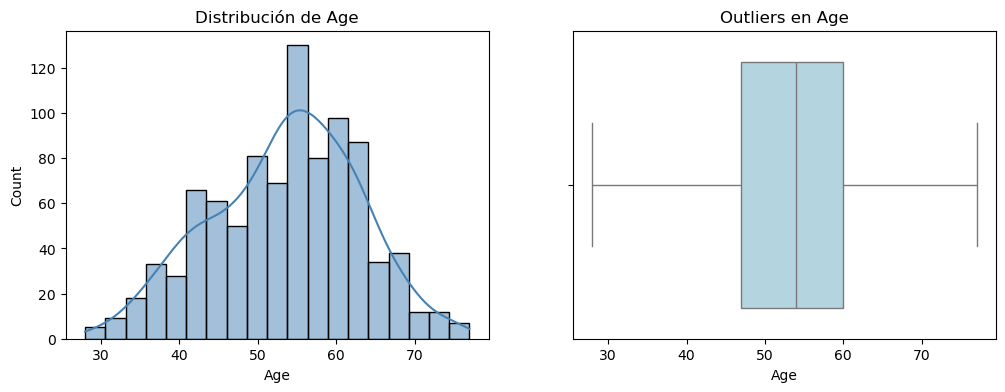

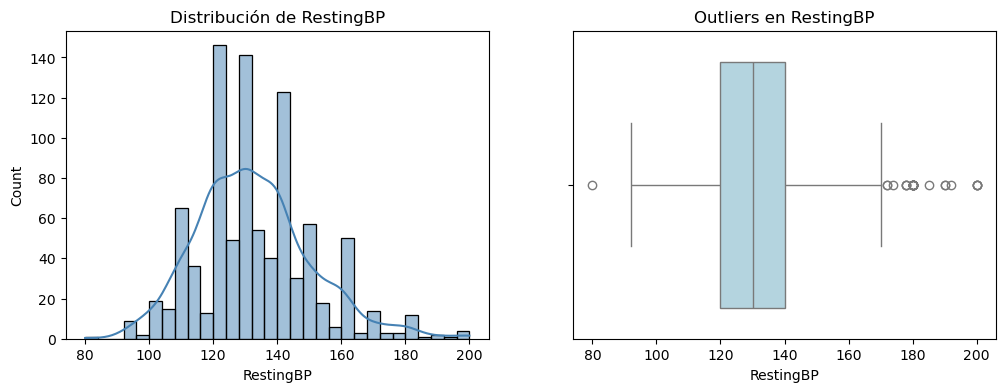

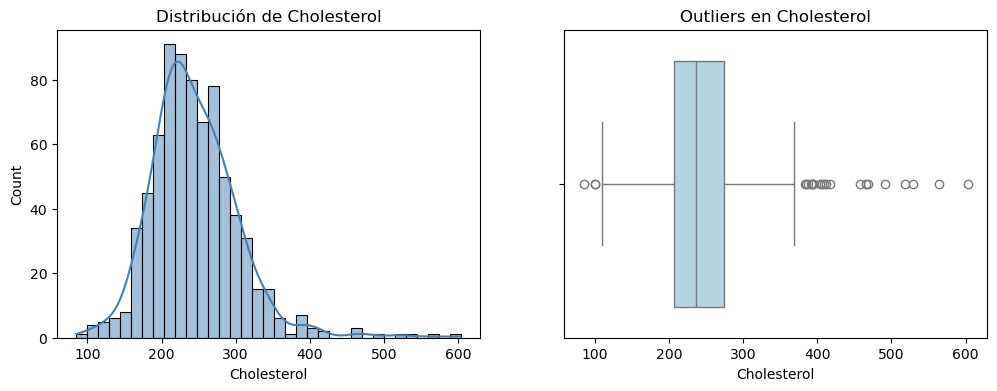

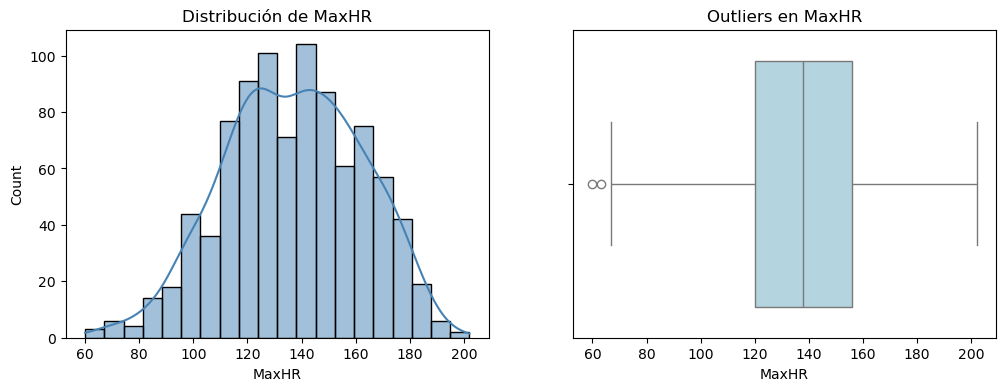

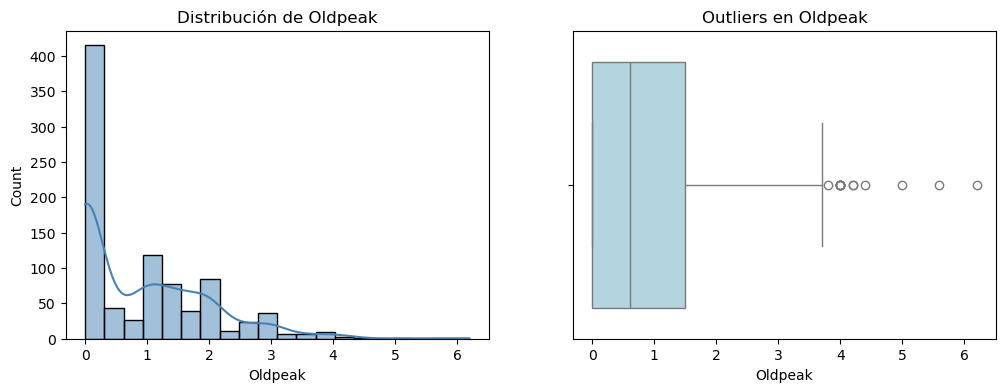

In [18]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(df[col], kde=True, ax=axes[0], color="steelblue")
    axes[0].set_title(f"Distribución de {col}")
    sns.boxplot(x=df[col], ax=axes[1], color="lightblue")
    axes[1].set_title(f"Outliers en {col}")
    plt.show()

- **Patrones:** `Age` ~normal; `MaxHR` amplio; `Oldpeak` sesgado; outliers en `Cholesterol` y `RestingBP`.
- **Implicación:** considerar estandarización y manejo de outliers antes del modelado.

### 🧮 Análisis univariado (categóricas)
Se grafican conteos por categoría para visualizar su distribución.

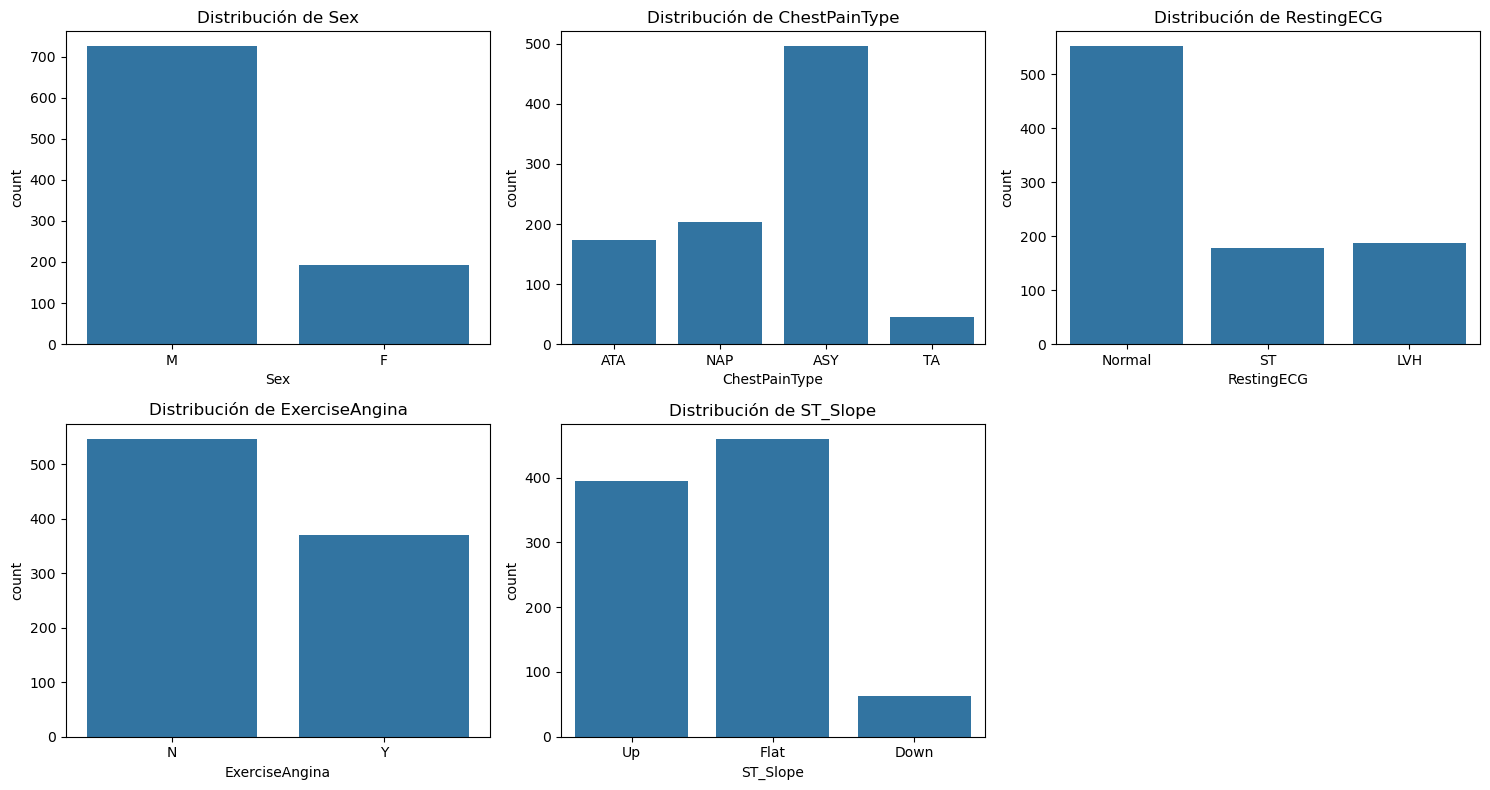

In [19]:
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
fig, axes = plt.subplots(2, 3, figsize=(15,8))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')

fig.delaxes(axes[-1])  # Remove unused subplot

plt.tight_layout()
plt.show()

- **Patrones:** `Sex` domina en hombres; `ChestPainType` concentra en **ASY**; `ST_Slope` más común **Flat**.
- **Implicación:** estas categorías podrían estar asociadas a mayor riesgo.

### 🧭 Correlaciones
Se calcula la matriz de correlación entre variables numéricas y se visualiza con un heatmap.

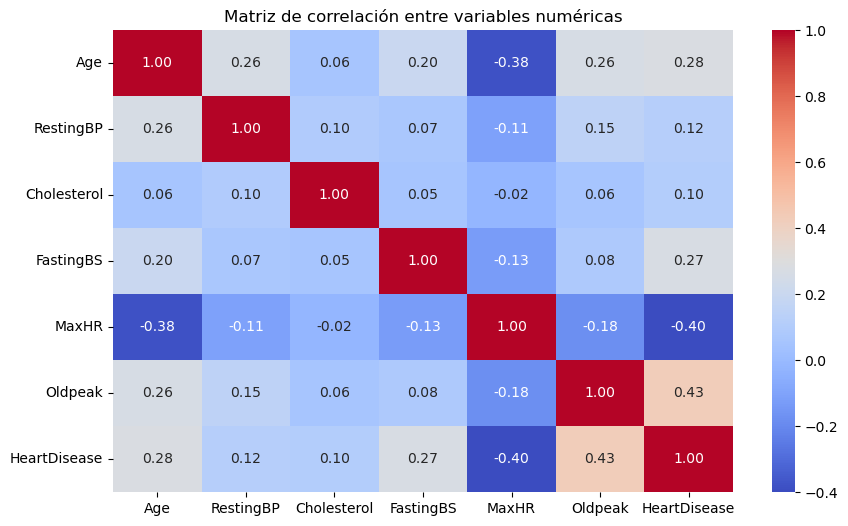

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

- **Correlaciones:** `Oldpeak` (+) y `MaxHR` (–) muestran asociación más marcada con `HeartDisease`.
- **Multicolinealidad:** baja entre numéricas.

### Proporción de Enfermedad Cardiaca por genero

C:\Users\mming\AppData\Local\Temp\ipykernel_13660\2204860243.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='HeartDisease', data=df, ci=None)


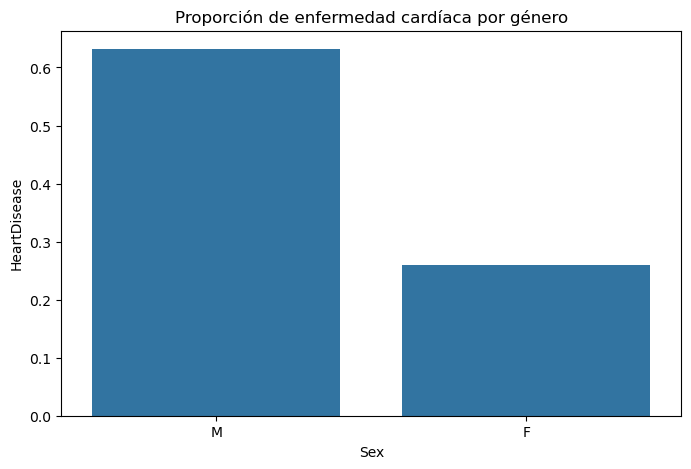

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex', y='HeartDisease', data=df, ci=None)
plt.title('Proporción de enfermedad cardíaca por género')
plt.show()

Se analiza los casos de proporcionde enfermedad cardíaca en hombres y mujeres 

### 🔀 Análisis bivariado (numérica vs objetivo)
Se comparan distribuciones de variables numéricas entre grupos de `HeartDisease` mediante boxplots.

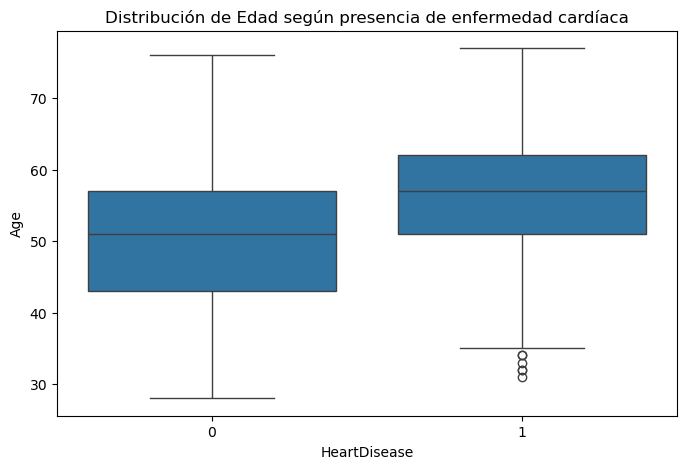

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Edad según presencia de enfermedad cardíaca')
plt.show()

- **Relaciones clave:** `MaxHR` menor y `Oldpeak` mayor en casos positivos; `Age` tiende a ser mayor con enfermedad.

### 🔀 Análisis bivariado (numérica vs objetivo)
Se comparan distribuciones de variables numéricas entre grupos de `HeartDisease` mediante boxplots.

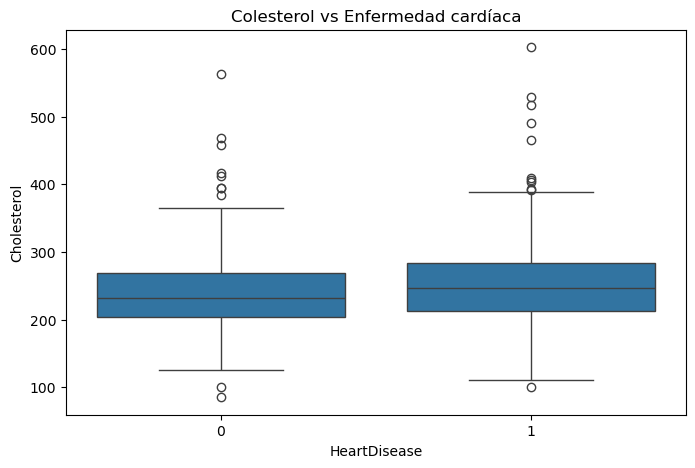

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)
plt.title('Colesterol vs Enfermedad cardíaca')
plt.show()

- **Relaciones clave:** `MaxHR` menor y `Oldpeak` mayor en casos positivos; `Age` tiende a ser mayor con enfermedad.

<Axes: xlabel='Age', ylabel='MaxHR'>

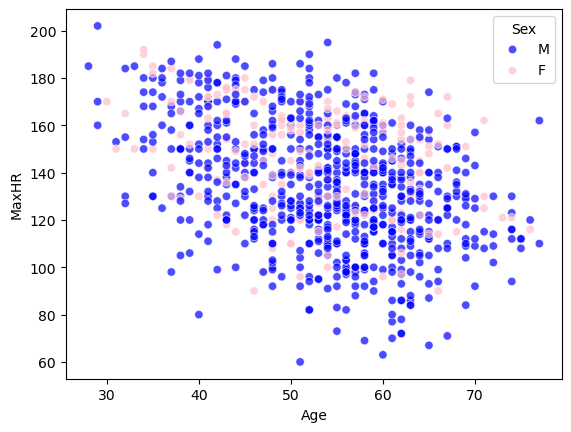

In [16]:
sns.scatterplot(
    data=df, 
    x="Age", 
    y="MaxHR", 
    hue="Sex", 
    palette={"M": "blue", "F": "pink"}, 
    alpha=0.7)

- **Nota:** paso auxiliar del flujo EDA. No modifica datos; orienta la comprensión del conjunto.

### 💡 Paso del EDA
Descripción breve del propósito de esta celda de código.

C:\Users\mming\AppData\Local\Temp\ipykernel_13660\1598646940.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ChestPainType', y='HeartDisease', data=df, ci=None)


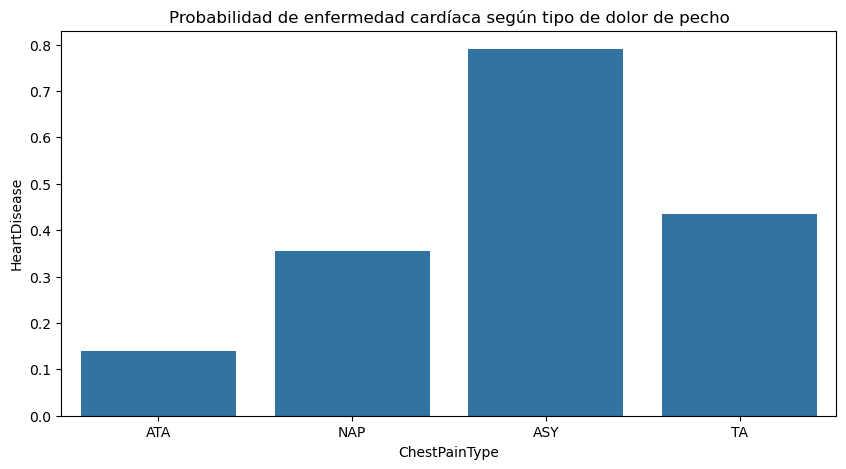

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='ChestPainType', y='HeartDisease', data=df, ci=None)
plt.title('Probabilidad de enfermedad cardíaca según tipo de dolor de pecho')
plt.show()

- **Nota:** paso auxiliar del flujo EDA. No modifica datos; orienta la comprensión del conjunto.

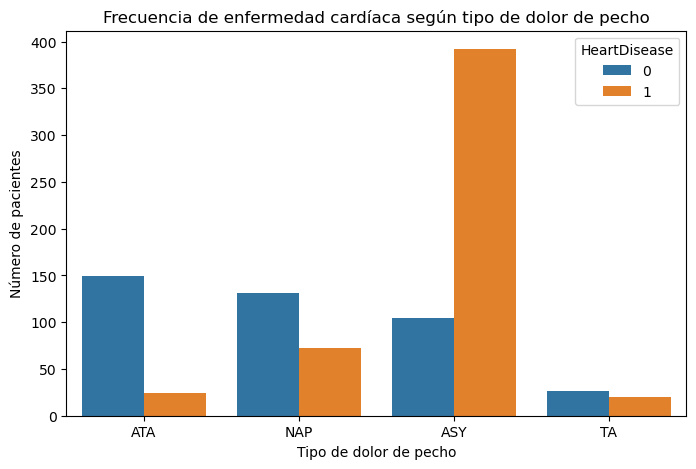

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df)
plt.title('Frecuencia de enfermedad cardíaca según tipo de dolor de pecho')
plt.xlabel('Tipo de dolor de pecho')
plt.ylabel('Número de pacientes')
plt.show()

- **Patrones:** `Sex` domina en hombres; `ChestPainType` concentra en **ASY**; `ST_Slope` más común **Flat**.
- **Implicación:** estas categorías podrían estar asociadas a mayor riesgo.